<a href="https://colab.research.google.com/github/DivyaNarayan0613/Cardio/blob/main/CardioVascularDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset provides information on the risk factors for
heart disease. The original database contains 76 attributes, but all published experiments refer to using a subset of 14 of thema and is refferenced as Cleveland dataset (link).
Experiments with the Cleveland database have concentrated on attempting to distinguish presence (value 1) or absence (value 0) of heart disease in the patient.
This is a typical binary classification task.

This database contains attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date.The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence from absence (value 0).

Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

    Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
    University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
    University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
    V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving CardioVascularDisease.csv to CardioVascularDisease.csv


In [ ]:
df=pd.read_csv('CardioVascularDisease.csv')

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Attribute Information**
    Age: Age
    Sex: Sex (1 = male; 0 = female)
        ChestPain: Chest pain (typical, asymptotic, nonanginal, nontypical)
    RestBP: Resting blood pressure
        Chol: Serum cholestoral in mg/dl
        Fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
        RestECG: Resting electrocardiographic results
        MaxHR: Maximum heart rate achieved
        ExAng: Exercise induced angina (1 = yes; 0 = no)
        Oldpeak: ST depression induced by exercise relative to rest
        Slope: Slope of the peak exercise ST segment
        Ca: Number of major vessels colored by flourosopy (0 - 3)
        Thal: (3 = normal; 6 = fixed defect; 7 = reversable defect)
        target: AHD - Diagnosis of heart disease (1 = yes; 0 = no)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


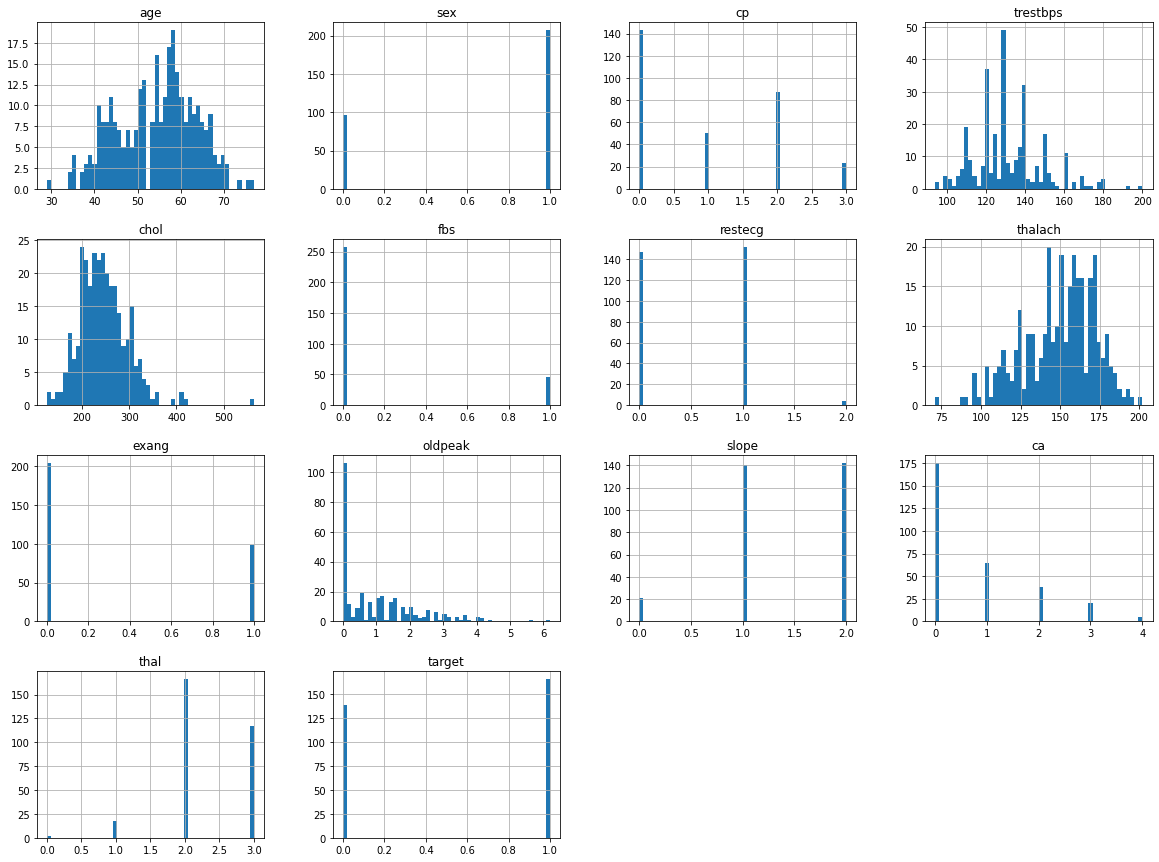

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
  corr_matrix=df.corr()
corr_matrix["cp"].sort_values(ascending=True)

exang      -0.394280
ca         -0.181053
thal       -0.161736
oldpeak    -0.149230
chol       -0.076904
age        -0.068653
sex        -0.049353
restecg     0.044421
trestbps    0.047608
fbs         0.094444
slope       0.119717
thalach     0.295762
target      0.433798
cp          1.000000
Name: cp, dtype: float64

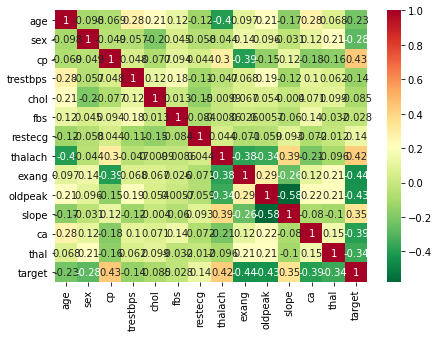

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5)) 
sns.heatmap(corr_matrix,annot=True,cmap='RdYlGn_r') 
plt.show()

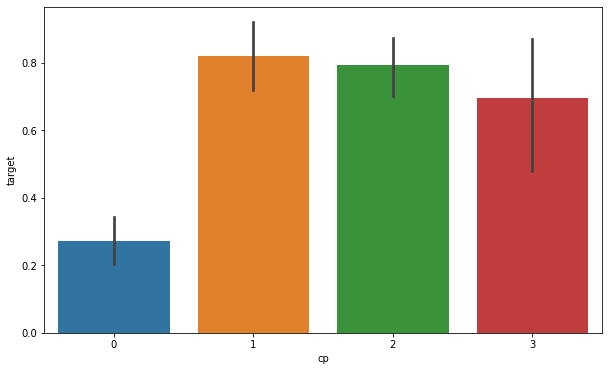

In [ ]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'cp', y = 'target', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


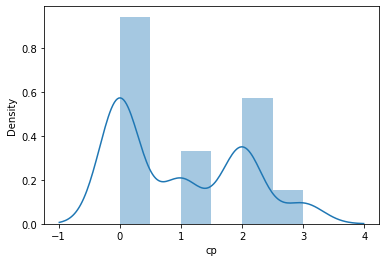

In [ ]:
sns.distplot(x['cp']);          #Similarly this curve fitting can be verified for other attributes

In [ ]:
x=df.drop(['target'],axis=1)
y=df['target']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]


In [ ]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def cross_val(model):
  pred = cross_val_score(model, x, y, cv=10)
  return pred.mean()

In [ ]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
# print the intercept
print(lin_reg.intercept_)

0.5495867768595041


In [ ]:
coeff_df = pd.DataFrame(lin_reg.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
age,-0.005764
sex,-0.091877
cp,0.104984
trestbps,-0.034964
chol,-0.013168
fbs,0.009510
restecg,0.027376
thalach,0.051402
exang,-0.078761
oldpeak,-0.068925


In [ ]:
pred = lin_reg.predict(x_test)

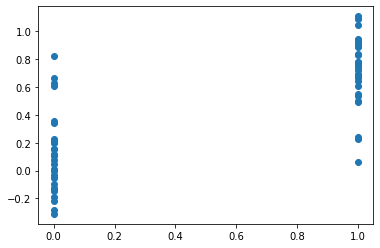

In [ ]:
plt.scatter(y_test, pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


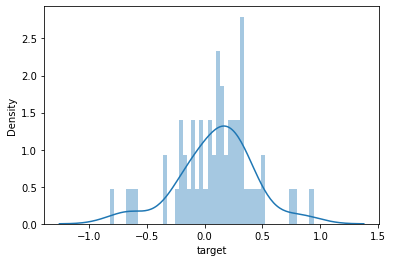

In [ ]:
sns.distplot((y_test - pred), bins=50);

In [ ]:
train_pred = lin_reg.predict(x_train)
test_pred = lin_reg.predict(x_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.26683680169007956
MSE: 0.1162707199288001
RMSE: 0.3409849262486541
R2 Square 0.5337894947682488
Train set evaluation:
_____________________________________
MAE: 0.28399357840776573
MSE: 0.12185181336963741
RMSE: 0.3490727909328331
R2 Square 0.5077512865986449


In [ ]:


results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df



,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.266837,0.116271,0.340985,0.533789,0.024519


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train, y_train)
pred = svm.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8688524590163934
[[26  3]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

